# Ethereum Prediction with Linear Regression

## Overview

__[Ethereum](https://ethereum.org)__ is a decentralized, open-source blockchain with smart contract functionality. Ether is the native cryptocurrency of the platform. Among cryptocurrencies, ether is second only to bitcoin in market capitalization. Ethereum was conceived in 2013 by programmer Vitalik Buterin. <br> <br>
In this project, we will attempt to predict the closing price of **Ethereum** by using a Linear Regression model, which is being trained on 80% of the dataset of **Ethereum** historical prices from January 2018 to December 2022. We will use **"Open" price** and **"Date"** as the independent variables in order to predict the **"Close" price**.

## Code

### Importing the libraries

In this section, we will import all the essential libraries that are needed for this project. The most notable ones should be: **numpy**, **pandas**, **seaborn** and **matplotlib**.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

%matplotlib inline

### Importing the dataset

We will be using Ethereum's historical price data from __[Yahoo Finance](https://finance.yahoo.com/quote/ETH-USD/history?p=ETH-USD)__ from January 1st, 2018 to December 31st, 2022. The file is also included within this project folder in order to avoid any mismatch.

In [2]:
# Reading the data and parsing the 'Date' field
eth_price = pd.read_csv("ETH-USD.csv", usecols=["Date", "Open", "Close"], parse_dates=["Date"])
eth_price = eth_price.sort_values("Date")
eth_price.head()

,Date,Open,Close
0,2018-01-01,755.757019,772.640991
1,2018-01-02,772.346008,884.443970
2,2018-01-03,886.000000,962.719971
3,2018-01-04,961.713013,980.921997
4,2018-01-05,975.750000,997.719971


### Exporatory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [3]:
# Getting the number of rows and columns
eth_price.shape

(1826, 3)

In [4]:
# Showing the statistics of numeric variables
eth_price.describe()

,Open,Close
count,1826.000000,1826.000000
mean,1147.241063,1147.253520
std,1200.784975,1200.263833
min,84.279694,84.308296
25%,209.032078,208.920326
50%,519.065552,518.846069
75%,1802.362610,1803.337372
max,4810.071289,4812.087402


In [5]:
# Exploring the data type of each column
eth_price.dtypes

Date     datetime64[ns]
Open            float64
Close           float64
dtype: object

In [6]:
# Checking for empty columns
eth_price.isna().sum()

Date     0
Open     0
Close    0
dtype: int64

<AxesSubplot:>

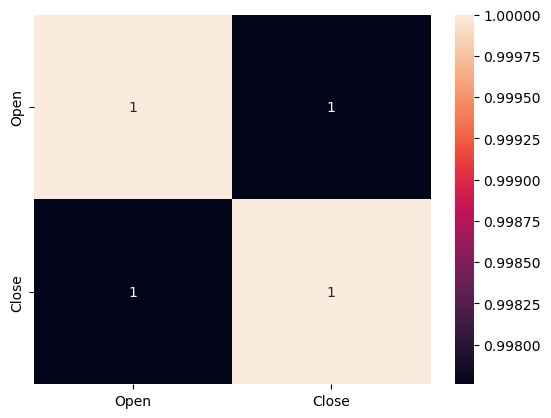

In [7]:
# Checking for correlation between different quantitative columns
sns.heatmap(eth_price.corr(), annot=True)

Text(0, 0.5, 'Price')

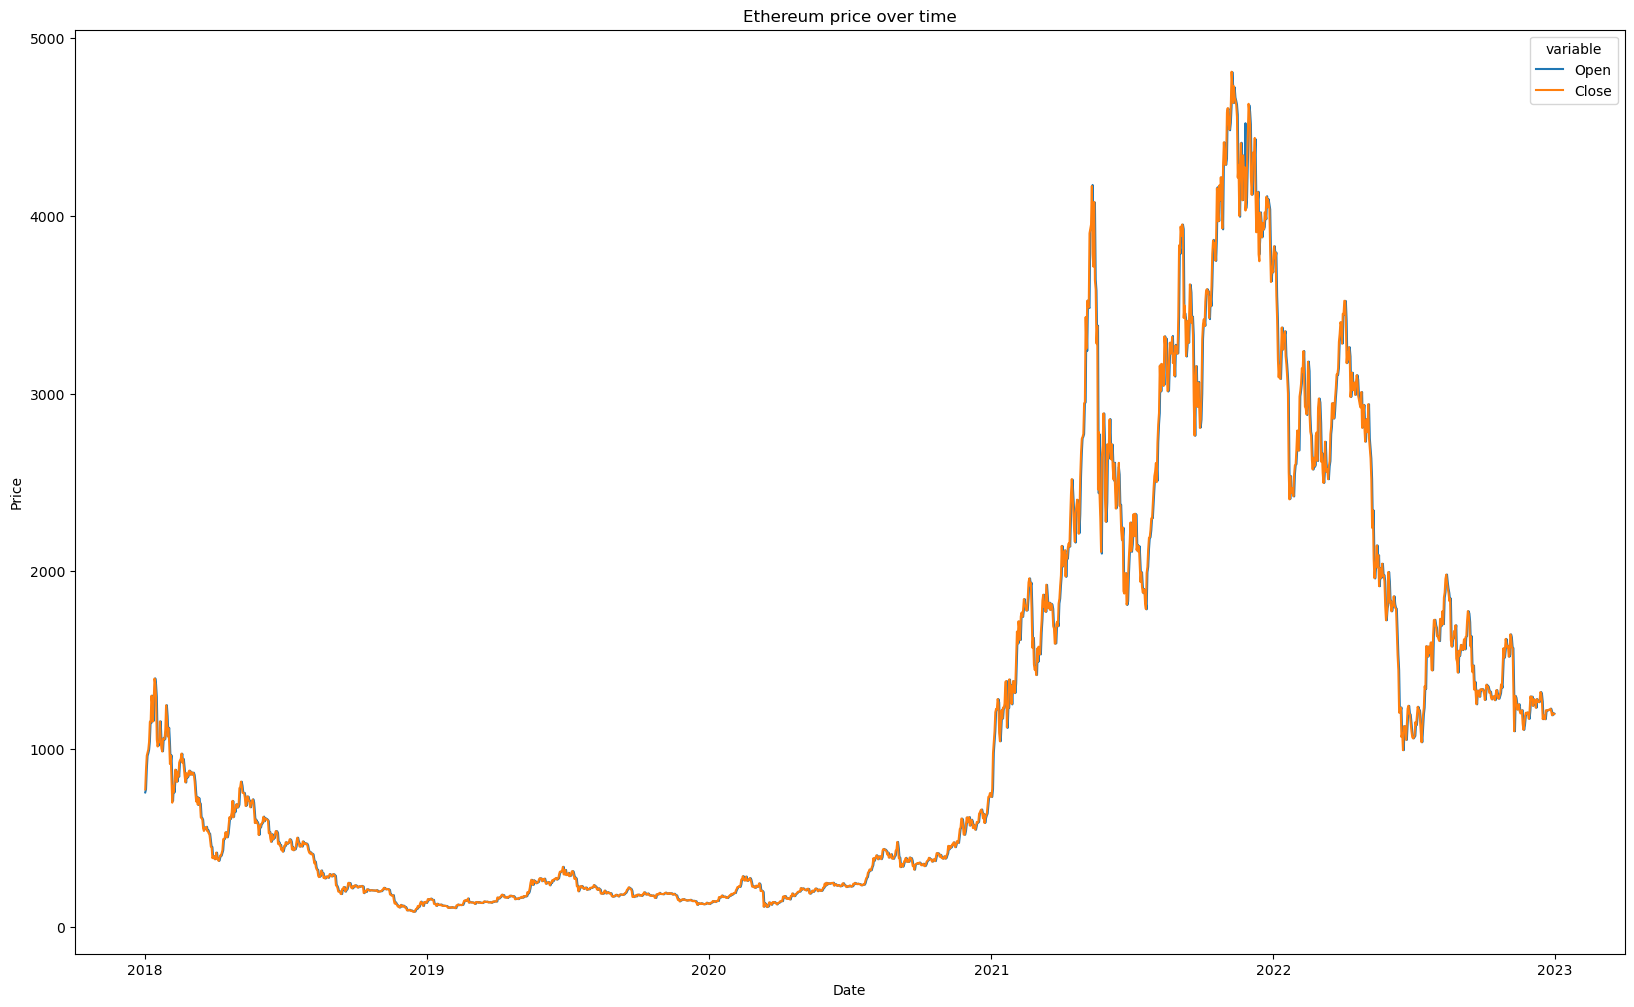

In [8]:
# Visualize the data
plt.figure(figsize = (20,12))
sns.lineplot(x="Date", y="value", hue="variable", data=pd.melt(eth_price, ["Date"])).set(title="Ethereum price over time")
plt.ylabel("Price")

### Modeling the dataset

Since linear regression model does not recognize timestamp, we will have to convert the timestamp into ordinal values.

In [9]:
eth_price['Date'] = pd.to_datetime(eth_price['Date']).apply(lambda date: date.toordinal())
eth_price

,Date,Open,Close
0,736695,755.757019,772.640991
1,736696,772.346008,884.443970
2,736697,886.000000,962.719971
3,736698,961.713013,980.921997
4,736699,975.750000,997.719971
...,...,...,...
1821,738516,1226.987061,1212.791626
1822,738517,1212.736572,1189.986084
1823,738518,1190.010132,1201.595337
1824,738519,1201.569580,1199.232788


[Text(736500.0, 0, '2017-06-20'),
 Text(736750.0, 0, '2018-02-25'),
 Text(737000.0, 0, '2018-11-02'),
 Text(737250.0, 0, '2019-07-10'),
 Text(737500.0, 0, '2020-03-16'),
 Text(737750.0, 0, '2020-11-21'),
 Text(738000.0, 0, '2021-07-29'),
 Text(738250.0, 0, '2022-04-05'),
 Text(738500.0, 0, '2022-12-11'),
 Text(738750.0, 0, '2023-08-18')]

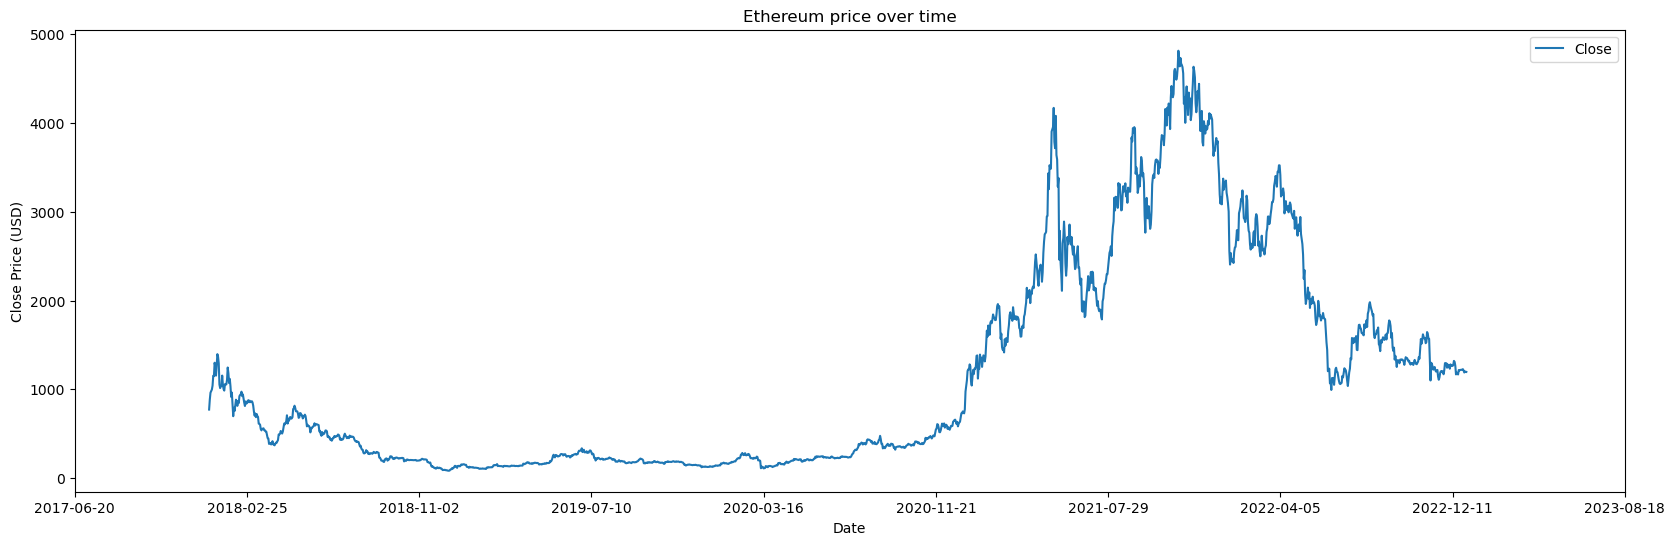

In [10]:
import matplotlib.ticker as mticker
eda_plot = eth_price.plot(x='Date', y='Close', figsize=(20,6))
eda_plot.set_title("Ethereum price over time")
eda_plot.set_xlabel("Date")
eda_plot.set_ylabel("Close Price (USD)")
new_labels = [date.fromordinal(int(item)) for item in eda_plot.get_xticks()]
eda_plot.set_xticks(eda_plot.get_xticks())
eda_plot.set_xticklabels(new_labels)

In [11]:
# Splitting the dataset to prepare for training
x = eth_price.loc[:, ["Date", "Open"]].values
y = eth_price.iloc[:, 2].values

### Training the dataset

In [12]:
# Splitting the dataset into the training set (80%) and test set (20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
# Fitting the training datasets into the Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [14]:
# Using the trained LR model to predict the dependent variables (y) based on the x values
y_pred = regressor.predict(x_test)
y_pred

array([ 227.15853491,  229.39940328,  681.62675625,  182.40180466,
        247.80451904,  240.37180729,   87.61989374, 1300.48061478,
        159.86421508, 1038.8773955 ,  168.31188375, 1878.6995361 ,
       3010.64479212,  433.49017446,  245.58934946, 3280.81937647,
        141.7307689 ,  452.68574356,  377.54635259, 2552.80642518,
        175.68579122,  202.66920749,  187.27351986,  291.45220711,
        185.61013067, 1012.45691085,  182.23185487,  324.18943907,
        588.64165123, 4624.78133561, 1224.9614218 , 1290.7817175 ,
        219.48513272, 3676.11059815,  224.24825431,  167.23778038,
       2271.75906809, 2541.16301664, 3324.81559827, 1139.37467695,
       4152.6799789 , 1715.36520462,  454.75688151, 1690.31973003,
       1573.99003035,  368.69264032,  272.94748417, 2812.34286725,
        237.5458369 , 1024.79616159, 1459.62888553, 1716.51542247,
       1877.40090555, 2554.24788952,  192.42754663,  127.1632084 ,
        224.99344551,  227.21862094, 3375.74907445,  501.63438

In [15]:
# Calculating the Coefficients
print(regressor.coef_)

[0.00473041 0.99633087]


In [16]:
# Calculating the Intercept
print(regressor.intercept_)

-3485.200264532437


### Evaluating the model

In order to evaluate the model, we will be using a statistical measure called R-Squared method that shows how well the data fit the regression model (the goodness of fit).

In [17]:
#Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9936097930328858

We can see that the model was able to predict the **"Close" price** with an accuracy of about 99.36%.

## Conclusion

Overall, this project does not express the ability to build an intensive machine learning model that can blindly predict the crypto prices. It rather serves as a project that can show the application of Linear Regression model by the author.